In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb_to_gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

## Plotting grayscale image

todo;
1) choose the right two images to be used
2) plot two images sidewise
3) create amp and phase image for both images and plot them
4) create image by combining amp of first image and phase of second image and plot it

In [3]:
duck = "duck.jpg"
pattern = "pattern.jpg"

## Images

In [4]:
duck_img = rgb_to_gray(plt.imread(duck))
pattern_img = rgb_to_gray(plt.imread(pattern))

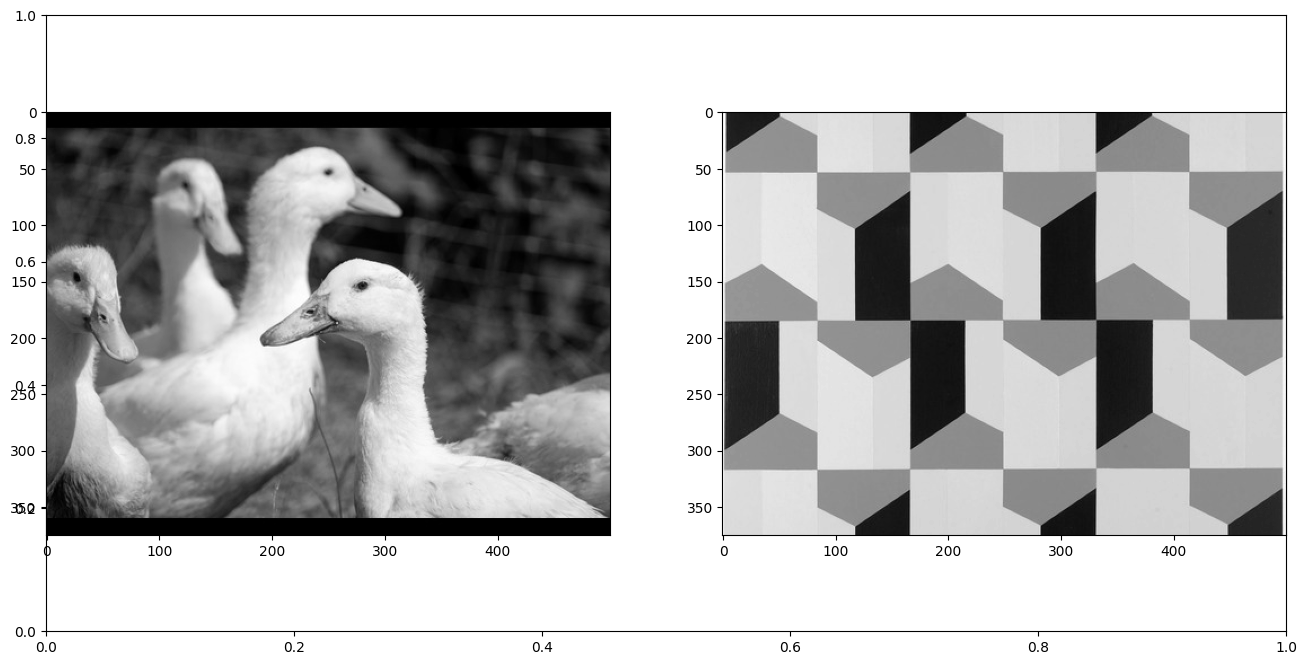

In [5]:
plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
img = plt.imshow(duck_img)
img.set_cmap('gray')
plt.subplot(1, 2, 2)
img = plt.imshow(pattern_img)
img.set_cmap('gray')

## Apply fourier transformation on duck image

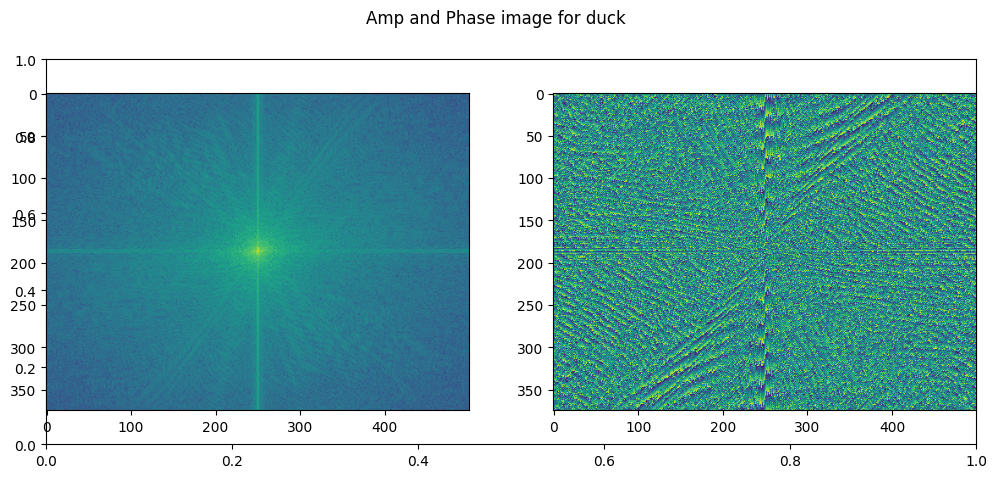

In [6]:
# duck_fft = np.fft.fft2(np.fft.fftshift(duck_img))
duck_fft = np.fft.fftshift(np.fft.fft2(duck_img))
plt.subplots(figsize=(12, 5))
plt.suptitle("Amp and Phase image for duck")
plt.subplot(1, 2, 1)
plt.imshow(10. * np.log10(np.abs(duck_fft)))


plt.subplot(1, 2, 2)
plt.imshow(np.angle(duck_fft))

## Apply fourier transformation on pattern image

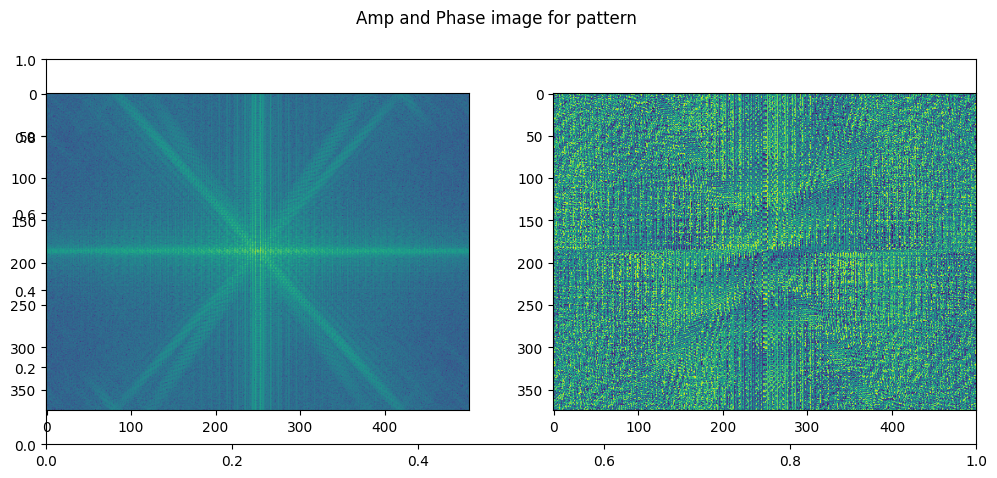

In [7]:
pattern_fft = np.fft.fftshift(np.fft.fft2(pattern_img))
plt.subplots(figsize=(12, 5))
plt.suptitle("Amp and Phase image for pattern")
plt.subplot(1, 2, 1)
plt.imshow(10. * np.log10(np.abs(pattern_fft)))

plt.subplot(1, 2, 2)
plt.imshow(np.angle(pattern_fft))

## Create image using amp of pattern and phase of duck

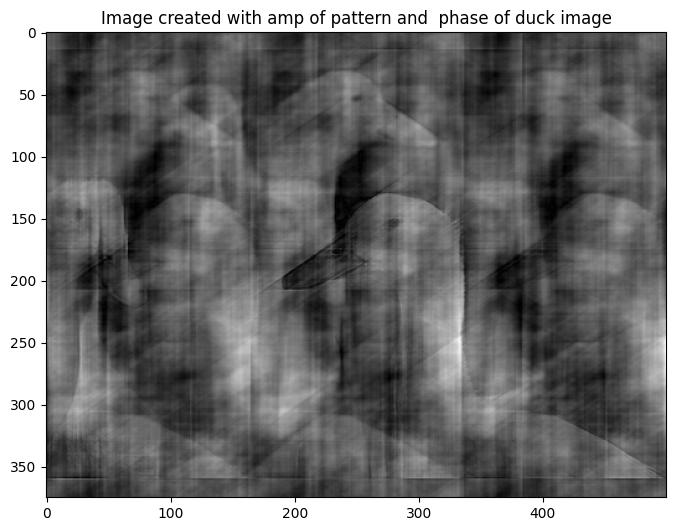

In [8]:
amp = np.abs(pattern_fft)
phase = np.angle(duck_fft)

hybrid_ftt = amp * (np.cos(phase) + 1j * np.sin(phase))

# applying inverse fft
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(hybrid_ftt)))


plt.figure(figsize=(8, 8))
plt.title("Image created with amp of pattern and  phase of duck image")
img = plt.imshow(hybrid)
img.set_cmap('gray')


## Create image using amp of duck and phase of pattern

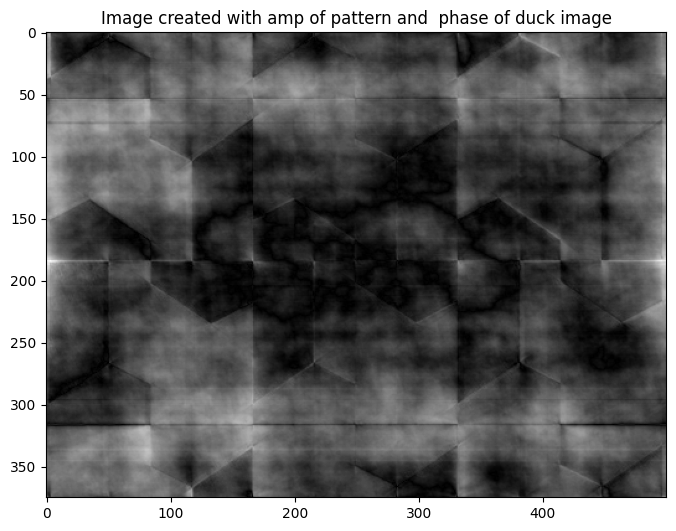

In [9]:
amp = np.abs(duck_fft)
phase = np.angle(pattern_fft)

hybrid_fft = amp * (np.cos(phase) + 1j * np.sin(phase))
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(hybrid_fft)))

plt.figure(figsize=(8, 8))
plt.title("Image created with amp of pattern and  phase of duck image")
img = plt.imshow(hybrid)
img.set_cmap("gray")

## Remarks

1) Phase mostly defines the structures of the image. So, when phase of duck is used and amp of pattern, only the duck is visible.
2) When phase of pattern and amp of duck is used, we can only see the pattern.

## Creating duck image using its phase and amp of all values 1.

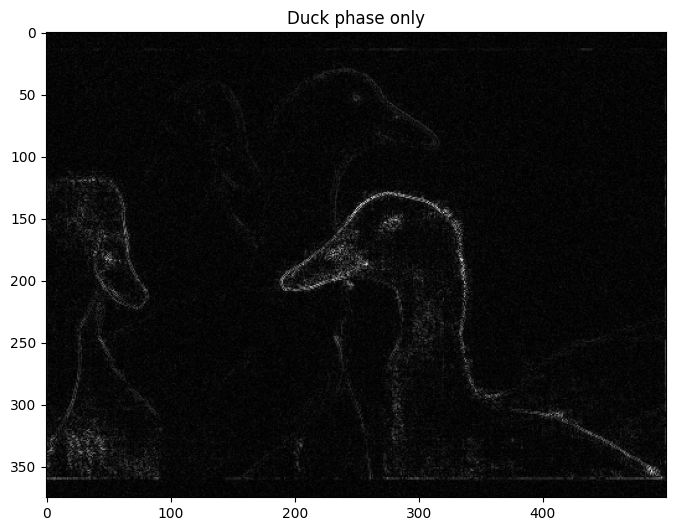

In [10]:
phase = np.angle(duck_fft)
amp = np.ones_like(duck_fft)

phase_only_duck_fft = amp * (np.cos(phase) + 1j * np.sin(phase))

phase_only_duck = np.abs(np.fft.ifft2(np.fft.fftshift(phase_only_duck_fft)))

plt.figure(figsize=(8, 8))
plt.title("Duck phase only")
img = plt.imshow(phase_only_duck)
img.set_cmap("gray")

## Creating duck image using amp only

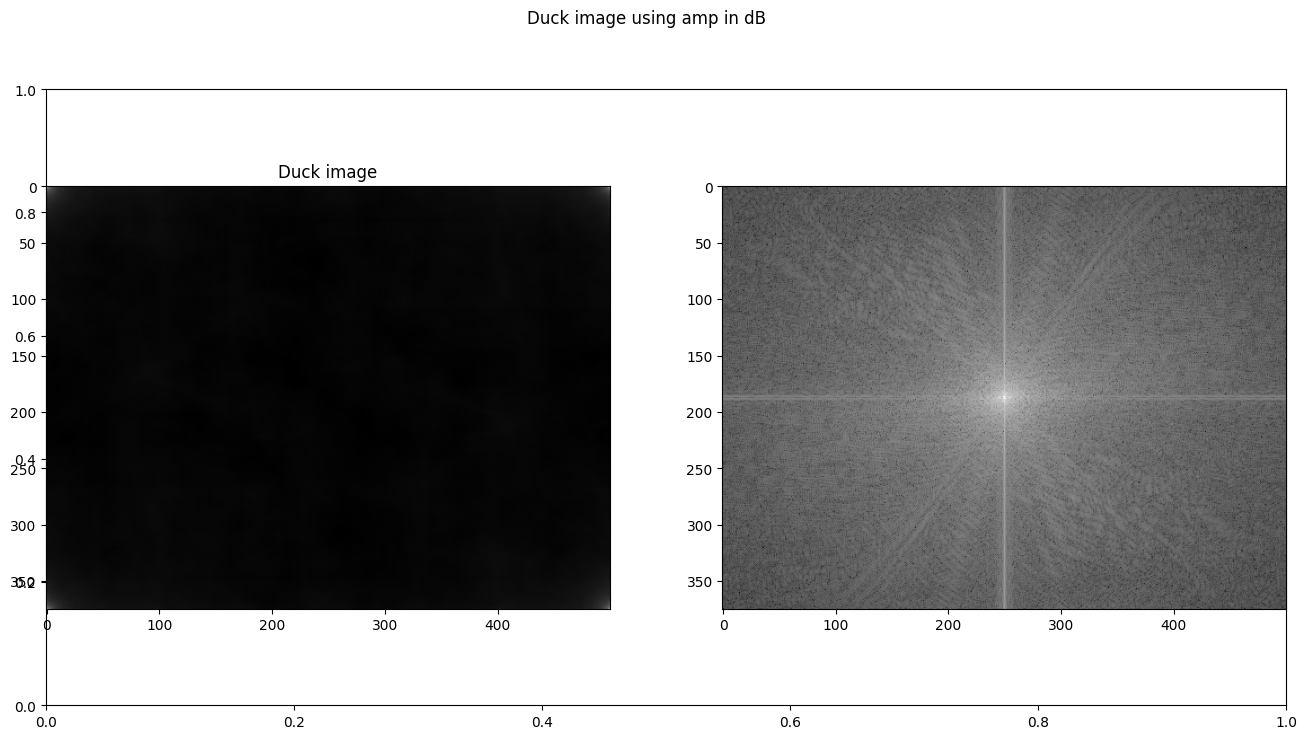

In [11]:
amp = np.abs(duck_fft)
phase = np.angle(np.zeros_like(duck_fft))

amp_only_duck_fft = amp * (np.cos(phase) + 1j * np.sin(phase))

amp_only_duck = np.abs(np.fft.ifft2(np.fft.fftshift(amp_only_duck_fft)))

plt.subplots(figsize=(16, 8))

plt.suptitle("Duck image using amp only")

plt.subplot(1, 2, 1)
plt.title("Duck image")
img = plt.imshow(amp_only_duck)
img.set_cmap("gray")

# using decibles

amp = 10. * np.log10(np.abs(duck_fft))
amp_only_duck_fft = amp
plt.suptitle("Duck image using amp in dB")
plt.subplot(1, 2, 2)
img = plt.imshow(amp)
img.set_cmap("gray")

## Creating duck images using real and imaginary components

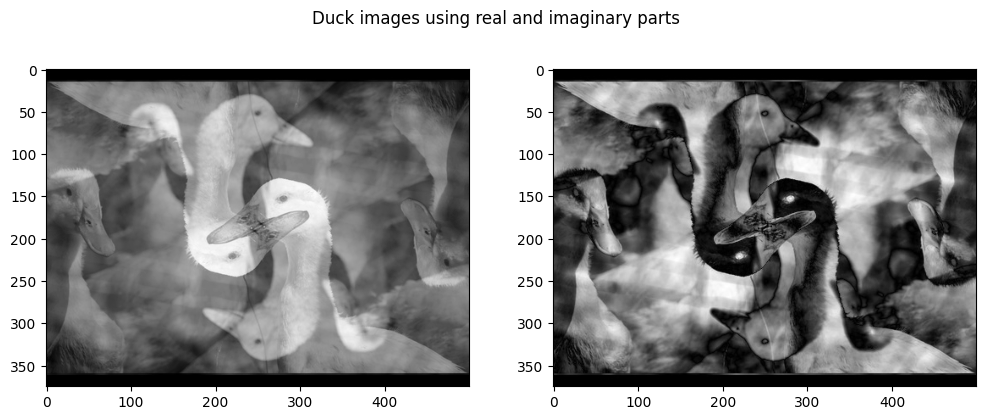

In [12]:
duck_fft_real = duck_fft.real
duck_fft_imag = duck_fft.imag
duck_real = np.abs(np.fft.ifft2(duck_fft_real))
duck_imag = np.abs(np.fft.ifft2(duck_fft_imag))


plt.subplots(figsize=(12, 4.5))
plt.suptitle("Duck images using real and imaginary parts")

plt.axis("off")
plt.grid(False)

plt.subplot(1, 2, 1)
img = plt.imshow(duck_real)
img.set_cmap("gray")

plt.subplot(1, 2, 2)
img = plt.imshow(duck_imag)
img.set_cmap("gray")

## Plotting point source image

In [13]:
def point_source_fft(img_size, y_pos, x_pos, amp=1):
    point_img = np.zeros((img_size + 1, img_size + 1))
    
    point_img[y_pos, x_pos] = amp
    
    plt.subplots(figsize=(18, 8))
    plt.suptitle("Single point image")
    
    plt.grid(False)
    plt.axis(False)
    
    plt.subplot(1, 2, 1)
    plt.title("Single centered point image")
    plt.imshow(point_img, interpolation='nearest')
    plt.colorbar(shrink=0.8)
    plt.set_cmap("gray")
    
    ## not sure why fftshit is happening before fourier transformation here?? above images shows opposite of it.
    point_img_fft = np.fft.fft2(np.fft.fftshift(point_img))
    # point_img_fft = np.fft.fftshift(np.fft.fft2(point_img))
    
    phase = np.angle(point_img_fft)
    plt.subplot(1, 2, 2)
    plt.title("Phase")
    plt.imshow(phase)
    plt.colorbar(shrink=0.8)
    plt.set_cmap('hsv')

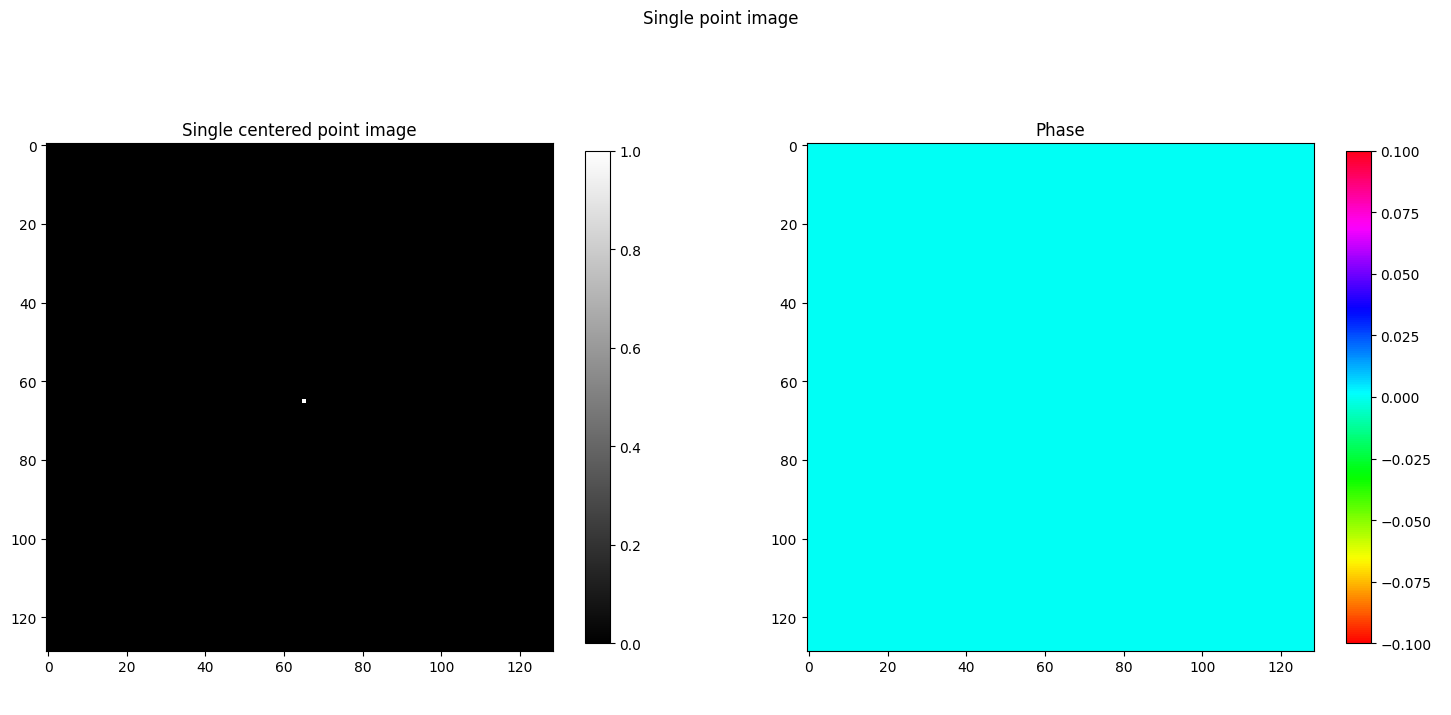

In [14]:
img_size = 128
x_pos = (img_size // 2) + 1
y_pos = (img_size // 2) + 1

point_source_fft(img_size, y_pos, x_pos)

## Phase fringe patterns on point location change from center

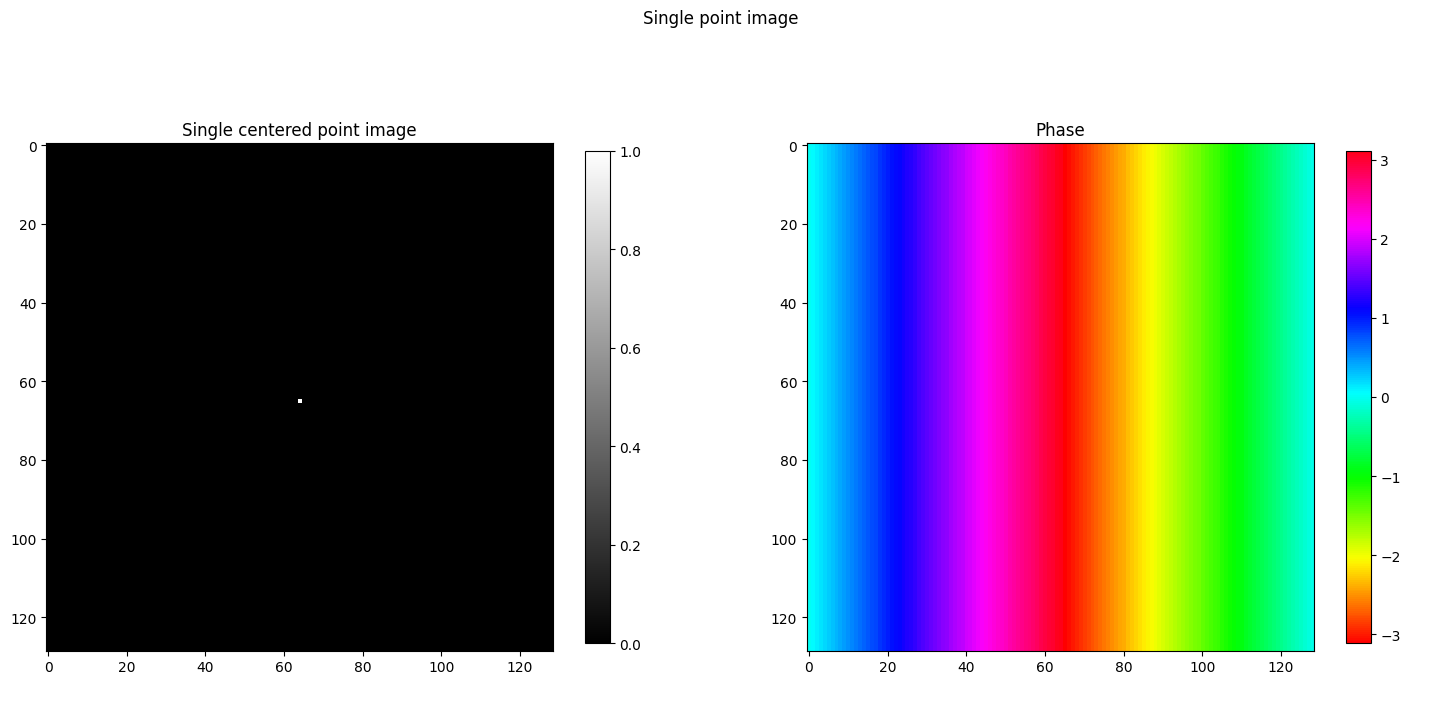

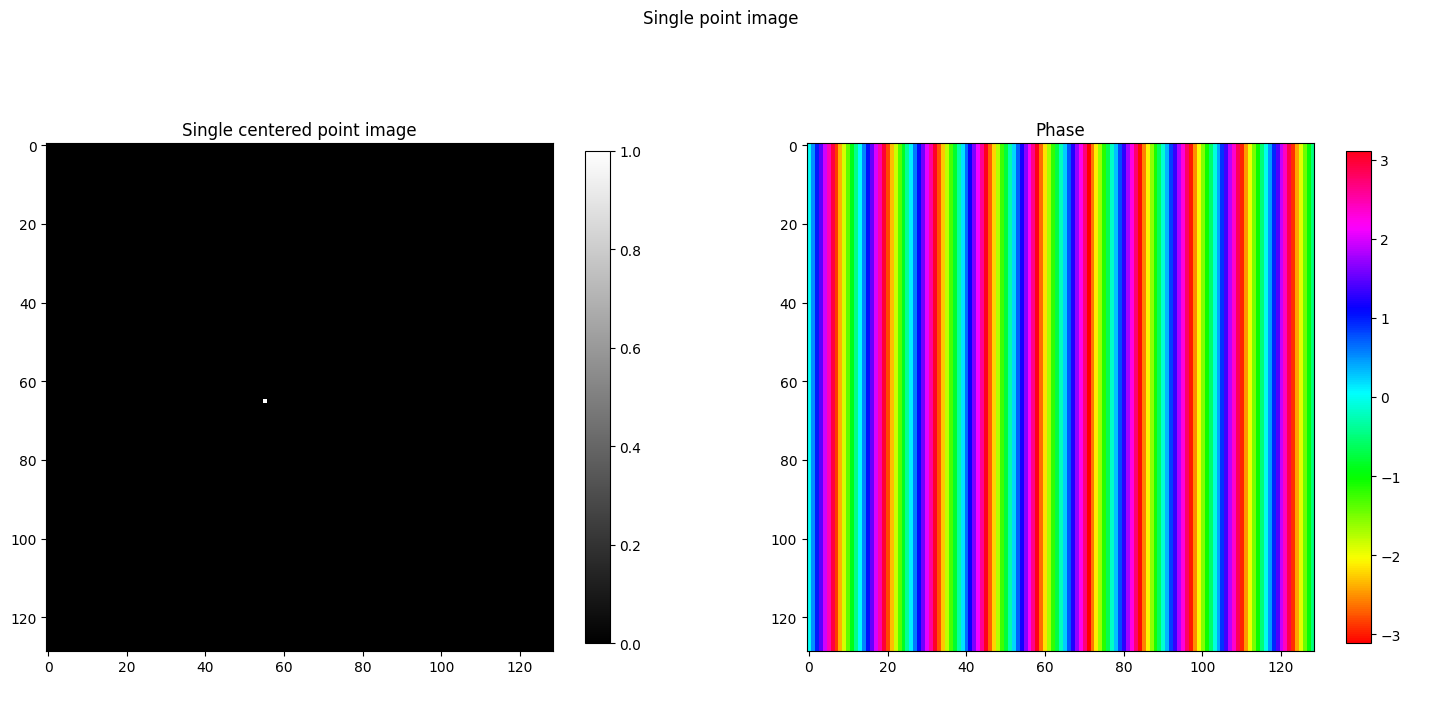

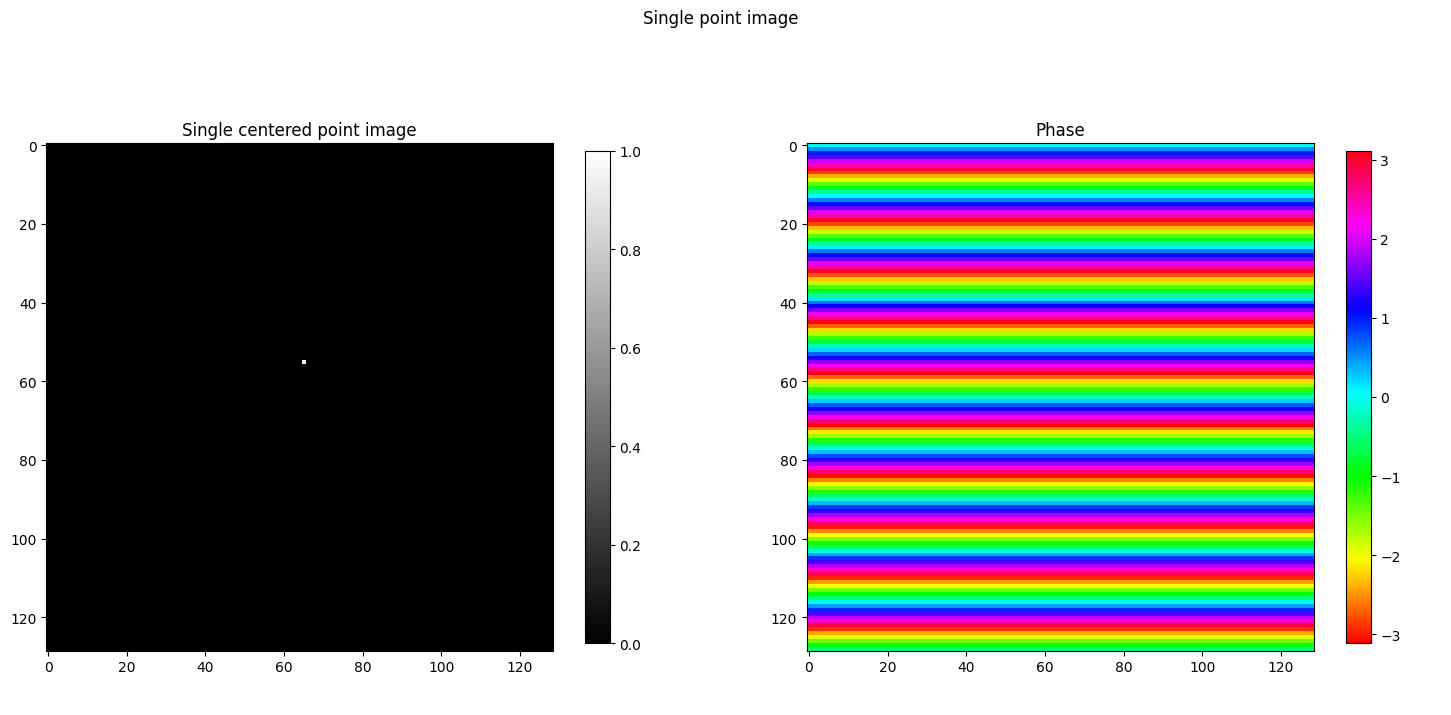

In [15]:
img_size = 128
point_source_fft(img_size, (img_size // 2) + 1, (img_size // 2))

point_source_fft(img_size, (img_size // 2) + 1, (img_size // 2) + 1 - 10)

point_source_fft(img_size, (img_size // 2) + 1 - 10, (img_size // 2) + 1)

### Remarks
1) So moving the point to left side, we get fringe color pattern for the phase.
2) Moving point vertically creates horizontal fringes.
3) Moving point horizontally creates vertical fringes.

## Phase fringe pattern while rotating pixel around center

In [16]:
def point_source_fft_circle(img_size, y_pos, x_pos, amp=1., radius=10.):
    ## create image
    img = np.zeros((img_size + 1, img_size+2))
    img[y_pos, x_pos] = amp
    img_fft = np.fft.fft2(np.fft.fftshift(img))

    ## plot setup
    plt.subplots(figsize=(18, 8))
    plt.grid(False)
    plt.axis(False)
    
    ## image plot without fft
    ax = plt.subplot(1, 2, 1)
    plt.set_cmap("gray")
    plt.title("image without fft")
    plt.imshow(img, interpolation='nearest')
    plt.colorbar(shrink=0.8)
    circle = plt.Circle(((img_size/2)+1, (img_size/2)+1), radius, color='blue', linewidth=2, fill=False)
    ax.add_patch(circle)

    ## phase
    phase = np.angle(img_fft)
    plt.subplot(1, 2, 2)
    plt.title("image phase")
    plt.imshow(phase)
    plt.set_cmap("hsv")
    plt.colorbar(shrink=0.8)
    
    

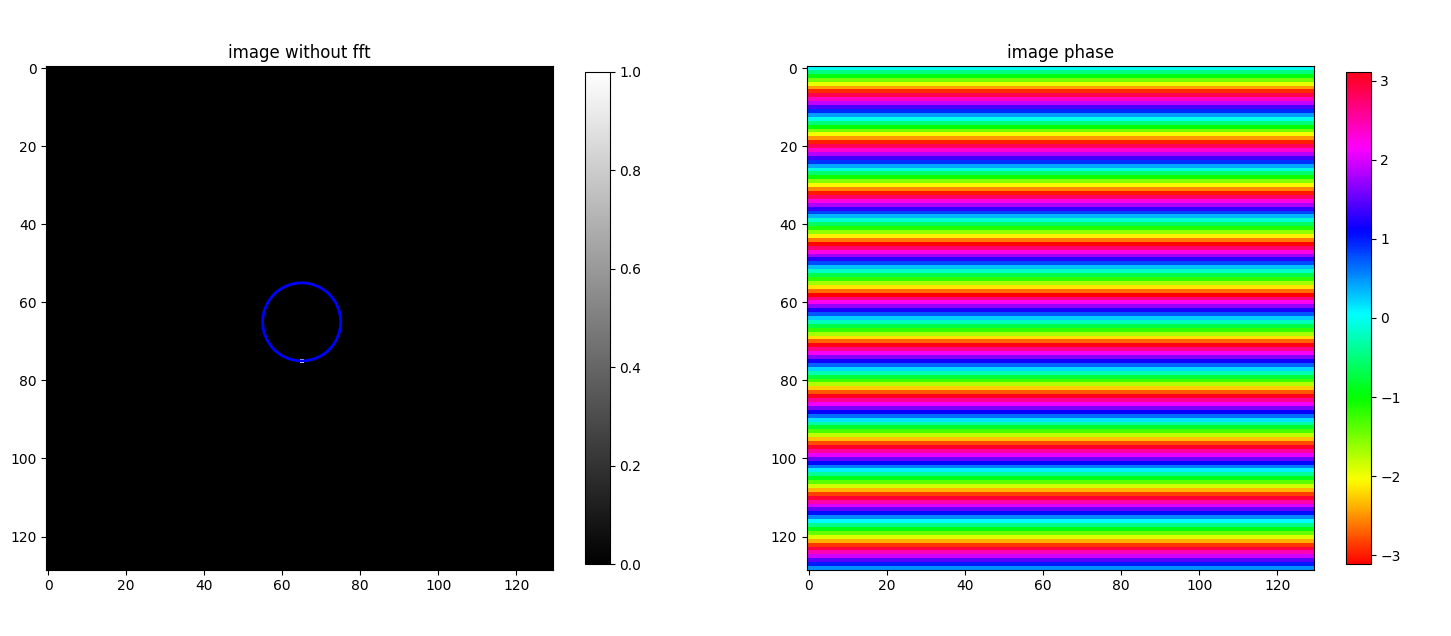

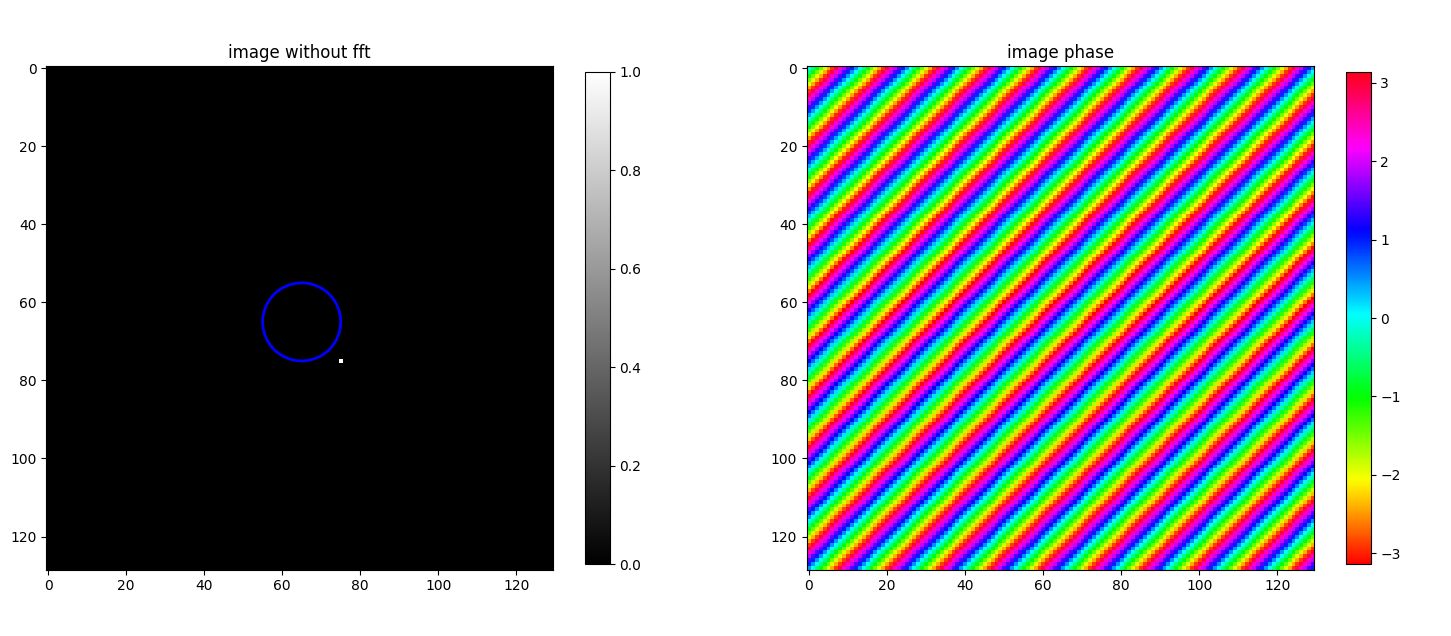

In [17]:
img_size = 128
point_source_fft_circle(img_size, (img_size // 2) + 1 + 10, (img_size // 2) + 1)
point_source_fft_circle(img_size, (img_size // 2) + 1 + 10, (img_size // 2) + 1 + 10)

### Remarks
1) When the pixel position rotates around the center without changing the distance, the phase frequency remains the same but the phase rotates.

## FFT of multiple source points

In [18]:
def multiple_fft(img_size, pos, amps):
    img = np.zeros((img_size + 1, img_size + 1))

    ## fillup amps
    for p, a in zip(pos, amps):
        img[p[0], p[1]] = a

    img_fft_phase = np.angle(np.fft.fft2(np.fft.fftshift(img)))
    
    plt.subplots(figsize=(18, 8))
    plt.suptitle("multiple source points image")
    plt.grid(False)
    plt.axis(False)

    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.8)

    plt.subplot(1, 2, 2)
    plt.title("phase")
    plt.imshow(img_fft_phase)
    plt.set_cmap("hsv")
    plt.colorbar(shrink=0.8)
    
    

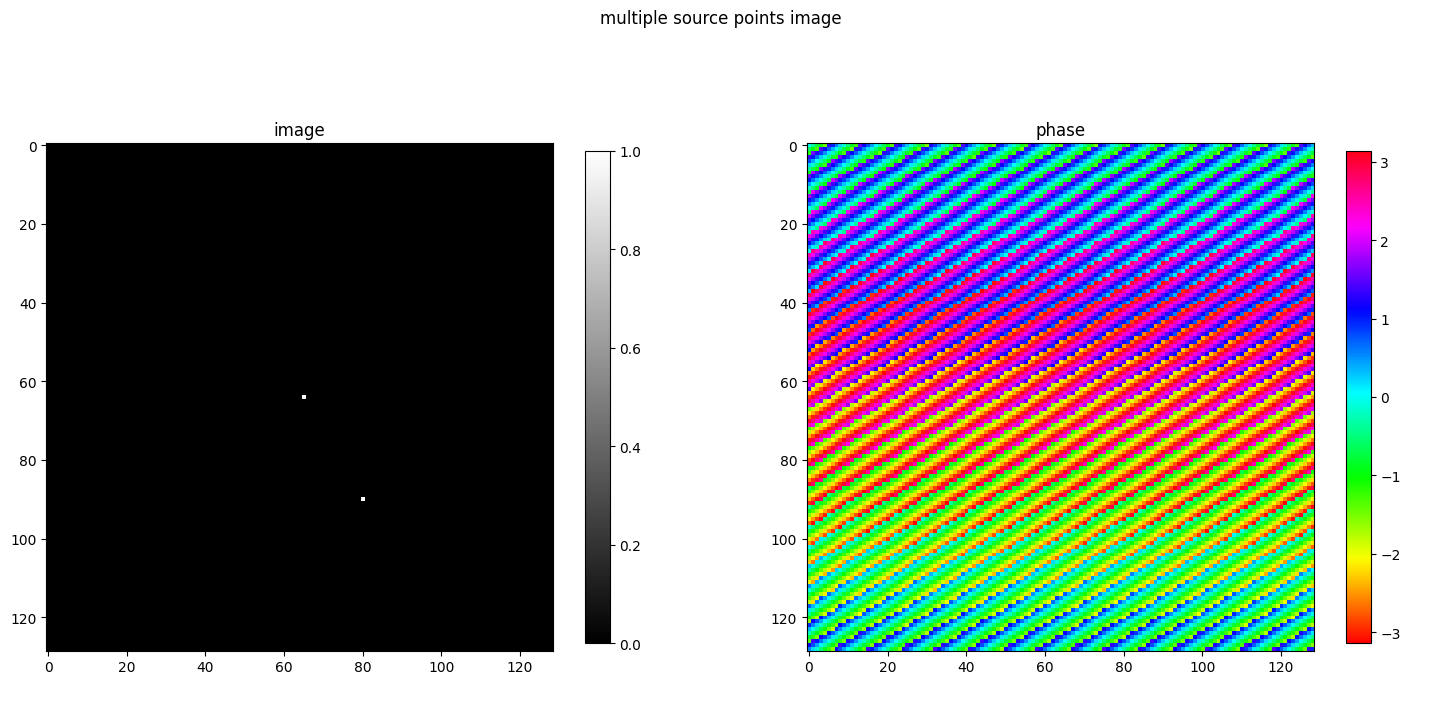

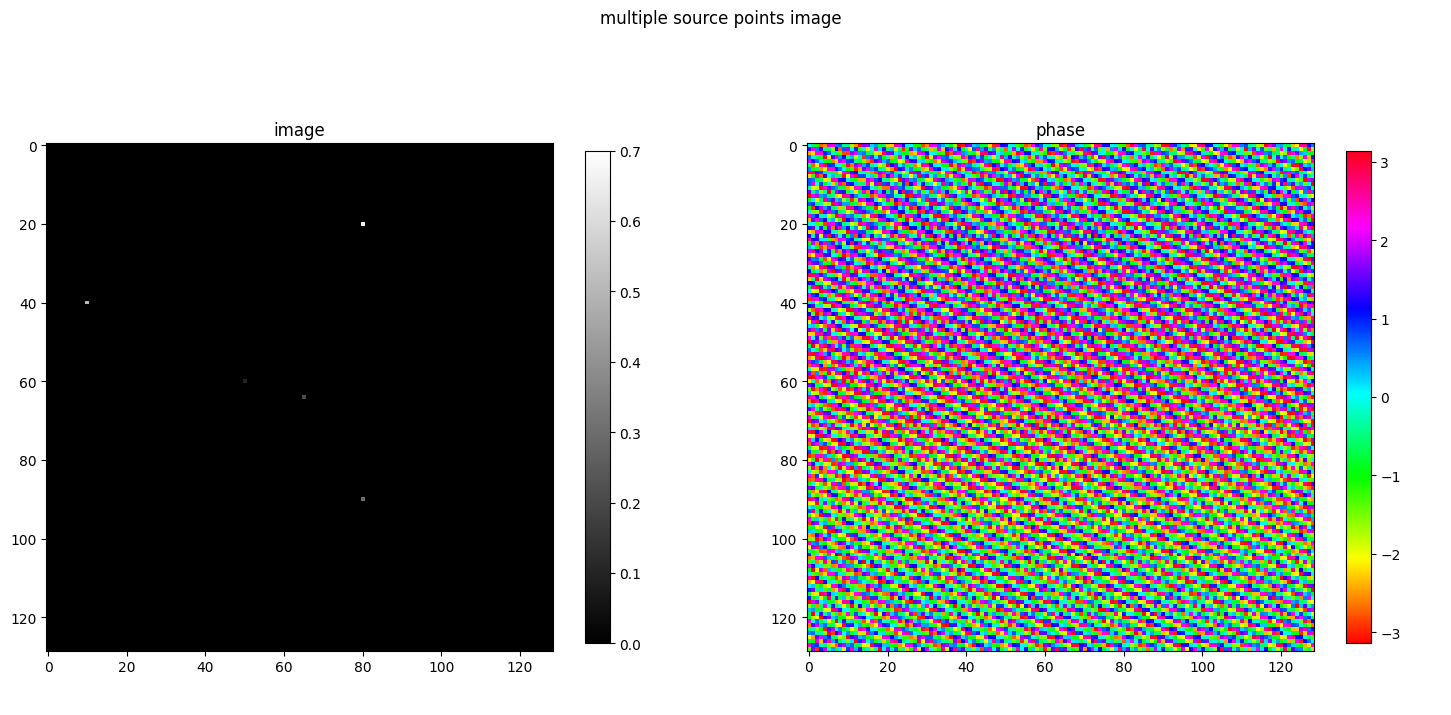

In [19]:
imgSize = 128

multiple_fft(imgSize, [[64, 65], [90,80]], [1., 1])
multiple_fft(imgSize, [[64,65], [90,80], [40,10], [60,50], [20,80]], [.2, 0.3, 0.5, 0.1, 0.7])

### Remarks

1) Image with multiple sources has resulting phase an amplitude weighted average of phases of each point source.
2) It means that for the averaging of phases of each individual sources, their amplitudes are also taken into consideration.

## Reconstructing duckk image

In [20]:
def reconstruct_image(vis, nsamples):
    new_vis = np.zeros_like(vis)
    y_pos = np.random.randint(0, high=vis.shape[0] - 1, size=int(nsamples))
    x_pos = np.random.randint(0, high=vis.shape[1] - 1, size=int(nsamples))
    
    new_vis[y_pos, x_pos] = vis[y_pos, x_pos] # substituting values

    img = np.fft.ifft2(np.fft.fftshift(new_vis))
    plt.subplots(figsize=(16, 6))
    plt.suptitle("Image reconstruction by taking samples")
    plt.grid(False)
    plt.axis(False)

    plt.subplot(1, 2, 1)
    plt.imshow(np.abs(new_vis).astype(bool), interpolation='nearest', cmap="gray")
    plt.title("sampled visibilities")
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(img), cmap="gray")
    plt.title("Reconstructed image")

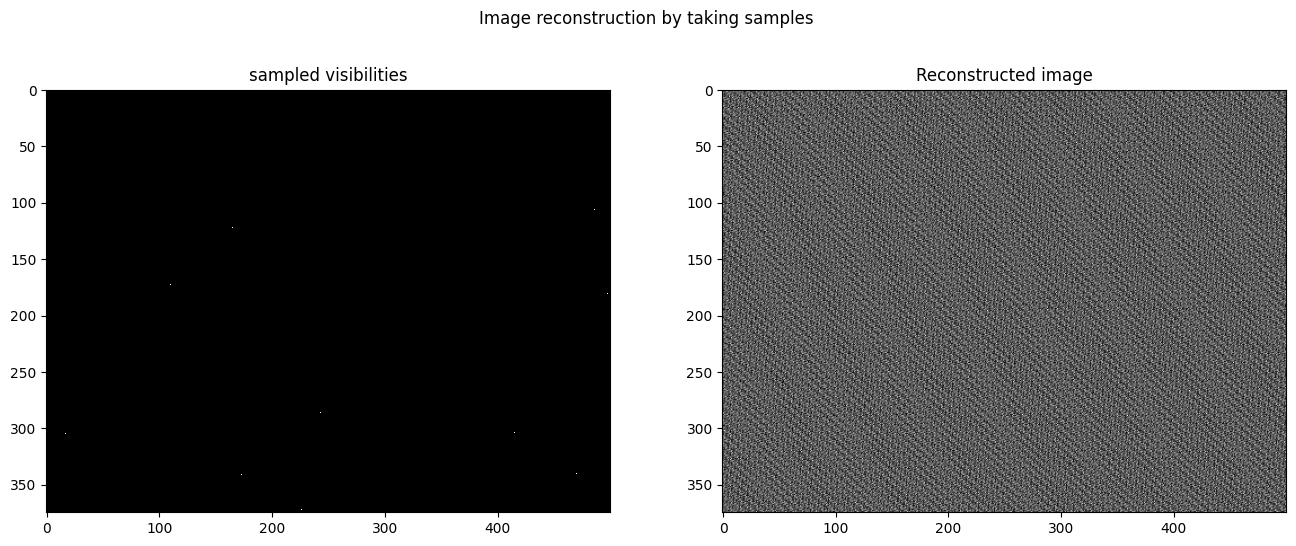

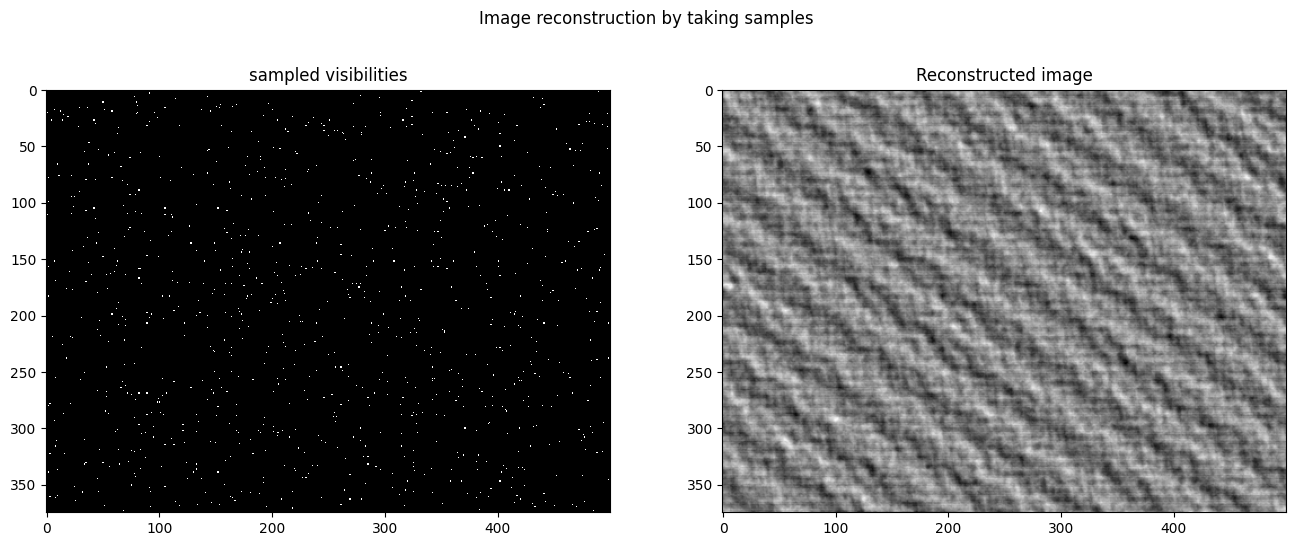

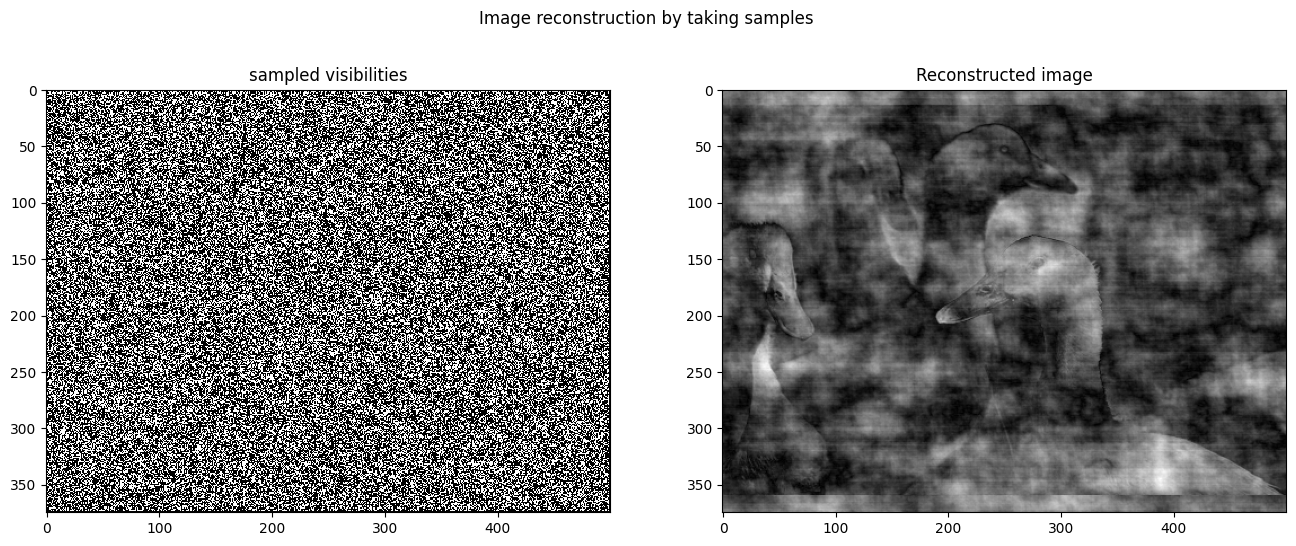

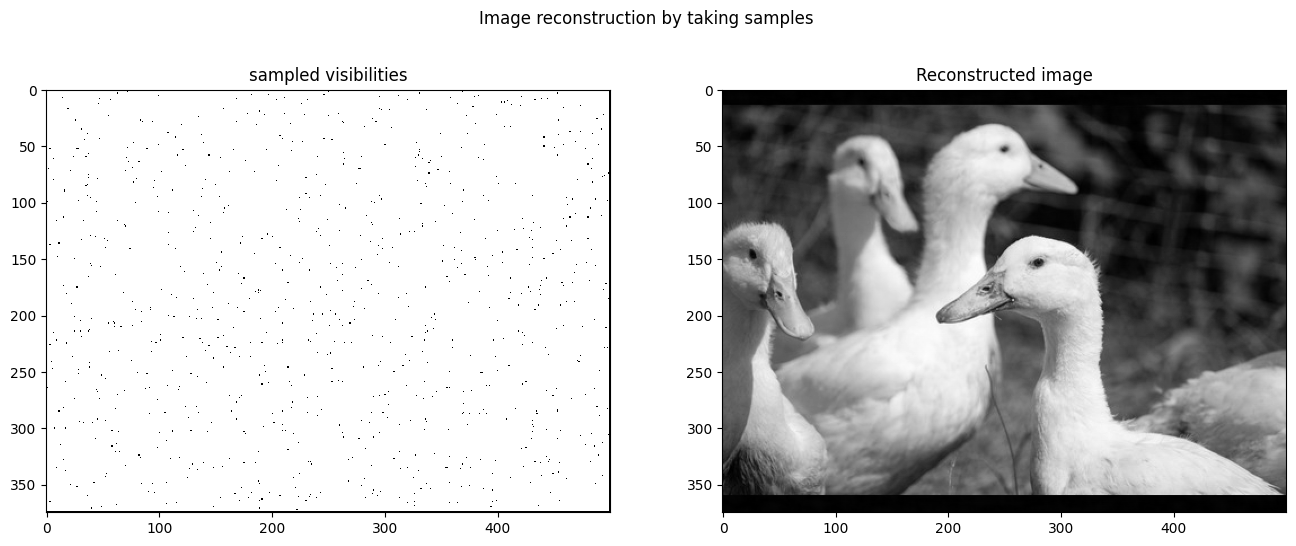

In [21]:
reconstruct_image(duck_fft, 1e1)
reconstruct_image(duck_fft, 1e3)
reconstruct_image(duck_fft, 1e5)
reconstruct_image(duck_fft, 1e6)


### Remarks

1) We can recreate the image by selecting spatial frequencies with different amplitude and phases.
2) We don't require to sample all the points to reconstruct the image.